<h1 style="text-align:center"> Hands on BiasAdjustCXX </h1>

Tool: https://github.com/btschwertfeger/BiasAdjustCXX
<br><br>
Copyright (C) 2023 Benjamin Thomas Schwertfeger<br>
E-Mail: benjamin.schwertfeger@awi.de, development@b-schwertfeger.de<br>
Link: https://b-schwertfeger.de<br>
GitHub: https://github.com/btschwertfeger<br>


Note: All data used here are fake and random generated, but the code can be applied to model generated data sets. 
_____

### 1. Download BiasAdjustCXX
Clone the repository into the actual working directory

In [ ]:
%%bash

# clone to home
git clone https://github.com/btschwertfeger/BiasAdjustCXX.git ~/BiasAdjustCXX 2> /dev/null
if [ $? != 0 ]; then
    echo "Downloading update ..."
    cd ~/BiasAdjustCXX && git pull https://github.com/btschwertfeger/BiasAdjustCXX.git 2> /dev/null
fi

Cloning into '/Users/benjamin/BiasAdjustCXX'...
remote: Enumerating objects: 570, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 570 (delta 63), reused 71 (delta 33), pack-reused 432
Receiving objects: 100% (570/570), 6.47 MiB | 2.32 MiB/s, done.
Resolving deltas: 100% (359/359), done.


### 2. Load required modules and compile BiasAdjustCXX
After the repository is downloaded, the required modules `netcdf` and `cmake` must be loaded to compile the `BiasAdjustCXX` tool.

In [11]:
%%bash
# create the build directory
cd ~/BiasAdjustCXX && mkdir -p build
# compile and build BiasAdjustCXX
cd build && cmake .. && cmake --build .

-- The CXX compiler identification is AppleClang 14.0.0.14000029
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- searching netCDFCxx...
-- Found netCDFCxx: /usr/local/lib/libnetcdf-cxx4.dylib  
-- netCDFCxx found!
-- Configuring done
-- Generating done
-- Build files have been written to: /Users/benjamin/BiasAdjustCXX/build
[ 14%] Building CXX object CMakeFiles/BiasAdjustCXX.dir/src/main.cxx.o
[ 28%] Building CXX object CMakeFiles/BiasAdjustCXX.dir/src/CMethods.cxx.o
[ 42%] Building CXX object CMakeFiles/BiasAdjustCXX.dir/src/Utils.cxx.o
[ 57%] Building CXX object CMakeFiles/BiasAdjustCXX.dir/src/NcFileHandler.cxx.o
[ 71%] Building CXX object CMakeFiles/BiasAdjustCXX.dir/src/MathUtils.cxx.o
[ 85%] Building CXX object CMakeFiles/BiasAdjustCXX.dir/s

Add the build directory to your path to make the BiasAdjustCXX tool globally executable (for this session):
```bash
export PATH=$PATH:~/BiasAdjustCXX/build 
```


Or add it permanently (directly into the console on ollie):
```bash
echo "export PATH=$PATH:~/BiasAdjustCXX/build" >> ~/.bash_profile 
```

___

Execute the `-h` (help) flag to test the program.

In [1]:
%%bash
export PATH=~/BiasAdjustCXX/build 

BiasAdjustCXX -h

BiasAdjustCXX Copyright (C) 2023 Benjamin Thomas Schwertfeger
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under certain conditions; type 'show -c' for details.

Usage: BiasAdjustCXX			\
	 --ref observation_data.nc	\
	 --contr control_data.nc	\
	 --scen data_to_adjust.nc	\
	 -v tas				\
	 -m linear_scaling		\
	 -o result_linear_scaling.nc

Parameters:
    required:
	--ref, --reference		observation/reanalysis data => input file/file path
	--contr, --control		modeled control period data => input file/file path
	--scen, --scenario		modeled scenario period data to adjust => input file/file path
	-o, --output			output file/file path
	-v, --variable			variable name (e.g.: tas, tsurf, pr) 
    optional:
	-h, --help			show this help message
	-q, --quantiles			number of quantiles to use when using a quantile adjustment method
	-k, --kind			kind of adjustment e.g.: '+' or '*' for additive or multiplicative method (default: '+')
	  

# Usage Example

Now we want to adjust a 3-dimensional data set with a resolution of 10950 x 4 x 2 (time, lat, lon)

In [3]:
%%bash
export PATH=$PATH:~/BiasAdjustCXX/build 
cd ~/BiasAdjustCXX
mkdir -p output 

input_dir="input_data"
variable="tas"
kind="+"
method="linear_scaling"

observations_control_period=$input_dir/observations.nc
modeled_control_period=$input_dir/control.nc
modeled_scenario_period=$input_dir/scenario.nc
ofile="output/${variable}_${method}_kind${kind}.nc"

BiasAdjustCXX \
    --ref $observations_control_period \ # reference data set (control period)
    --contr $modeled_control_period    \ # modeled data set   (control period)
    --scen $modeled_scenario_period    \ # data set to adjust (scenario period)
    -o $ofile                          \ # output file        (path + file name)       
    -v $variable                       \ # variable of interest
    -k $kind                           \ # additive or multiplicative adjustment
    -m $method                         \ # adjustment method 
    -p 4                                 # number of threads to use


BiasAdjustCXX Copyright (C) 2023 Benjamin Thomas Schwertfeger
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under certain conditions; type 'show -c' for details.

INFO: Data sets available
INFO: Method: linear_scaling (add)
INFO: Threads: 1
INFO: Scaling will be performed based on long-term 31-day intervals.
INFO: Starting the adjustment ...
2 / 2 [ ###################################################################### ] 100 %
INFO: Preparing data for saving ...
INFO: Saving: output/tas_linear_scaling_kind+.nc
INFO: Done!
Runtime: 571.407ms


After the data set is adjusted, we can now load and compare the results

In [2]:
import sys,os,warnings
warnings.filterwarnings('ignore')

In [1]:
# [optional] Install python modules
# !python3 -m pip install matplotlib netCDF4 xarray numpy scikit-learn

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the data sets
Now the reference, modeled and adjusted data sets can be loaded

In [6]:
data_path = '~/BiasAdjustCXX/input_data'
var = 'tas'

# control period
obsh = xr.open_dataset(f'{data_path}/observations.nc')
simh = xr.open_dataset(f'{data_path}/control.nc')

# scenario period
obsp = xr.open_dataset(f'{data_path}/observations_future.nc')
simp = xr.open_dataset(f'{data_path}/scenario.nc')

In [7]:
# load the previous corrected data set
tas_ls_corrected = xr.open_dataset('~/BiasAdjustCXX/output/tas_linear_scaling_kind+.nc')
tas_ls_corrected

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 4, lon: 2)
Coordinates:
  * time     (time) object 2001-01-01 00:00:00 ... 2030-12-31 00:00:00
  * lat      (lat) float32 23.0 24.0 25.0 26.0
  * lon      (lon) float32 0.0 1.0
Data variables:
    tas      (time, lat, lon) float32 ...

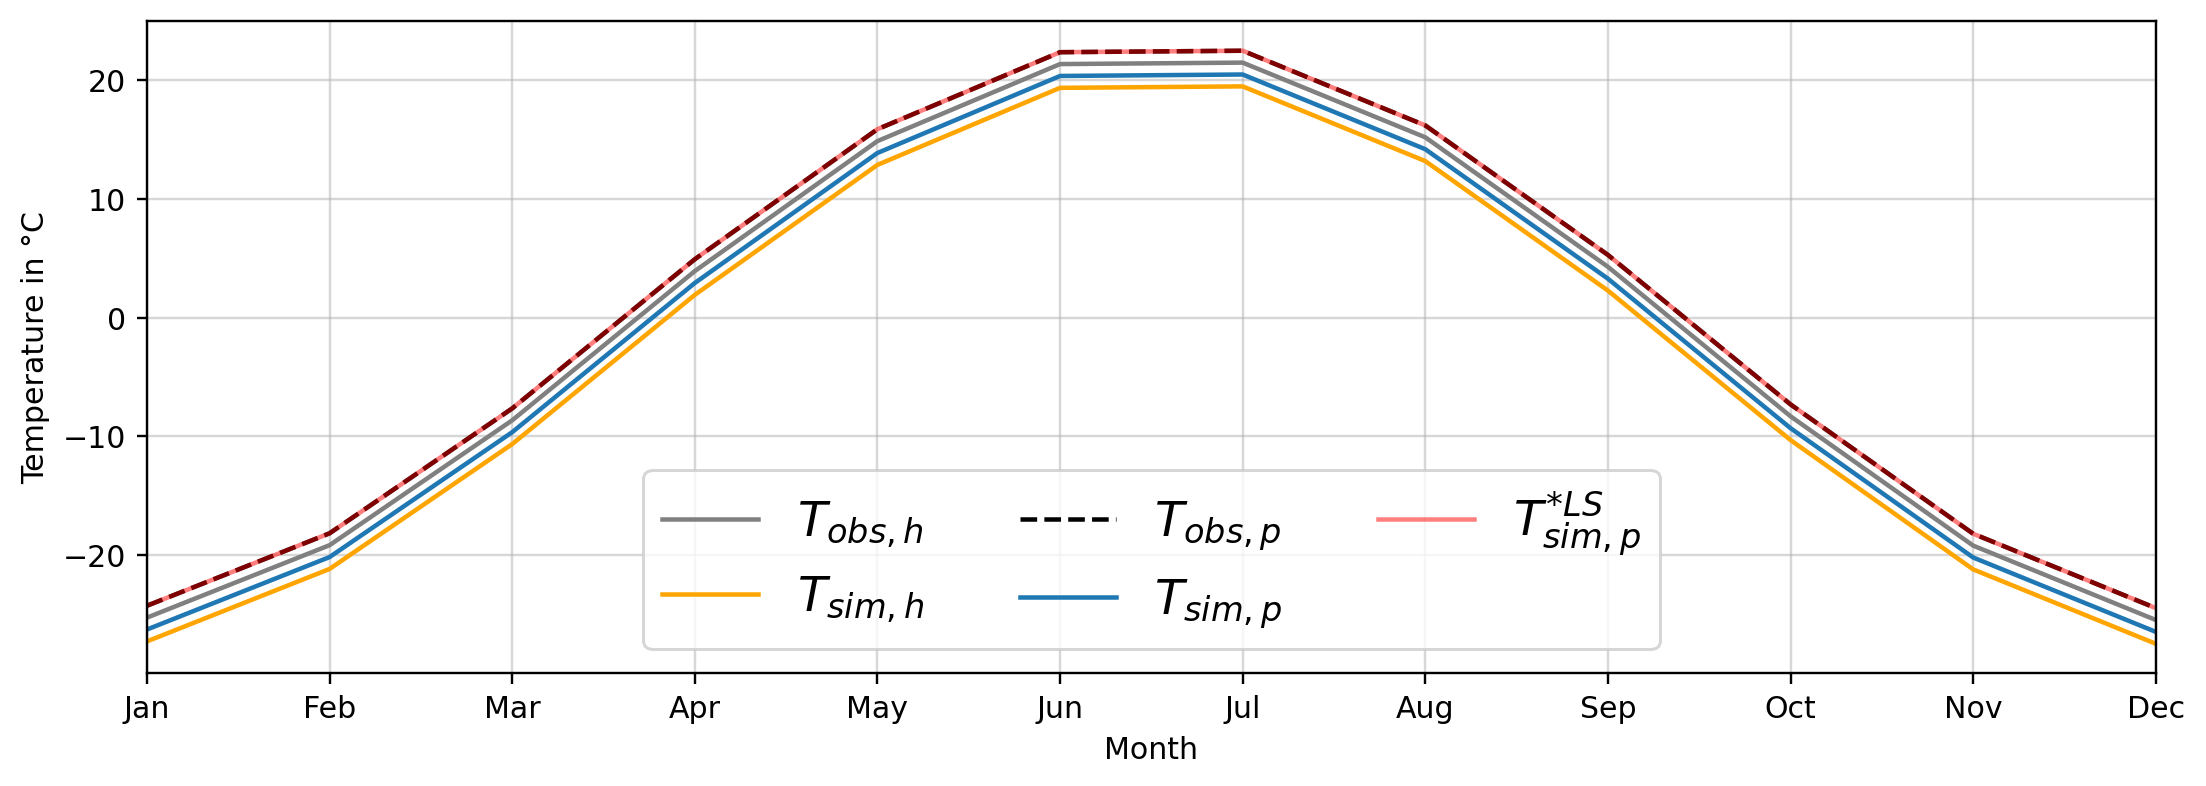

In [17]:
labels = ['$T_{obs,h}$', '$T_{obs,p}$', '$T_{sim,p}$', '$T^{*LS}_{sim,p}$']
plt.figure(figsize=(12,4),dpi=216)
period = 'time.month'
plt.plot(obsh[var].groupby(period).mean(...), color='gray', label=labels[0])
plt.plot(simh[var].groupby(period).mean(...), color='orange', label='$T_{sim,h}$')
plt.plot(obsp[var].groupby(period).mean(...), color='black', linestyle='--', label=labels[1])
plt.plot(simp[var].groupby(period).mean(...), color='C0', label=labels[2])
plt.plot(tas_ls_corrected['tas'].groupby(period).mean(...), color='red', label=labels[3],alpha=.5)

plt.gca().set_xticks(np.arange(12))
plt.gca().set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.gca().yaxis.grid(alpha=0.5)
plt.gca().xaxis.grid(alpha=0.5)

plt.xlabel('Month')
plt.ylabel(f'Temperature in °C')

plt.legend(fontsize=16, loc='lower center', ncol=3);
plt.xlim(0,11);

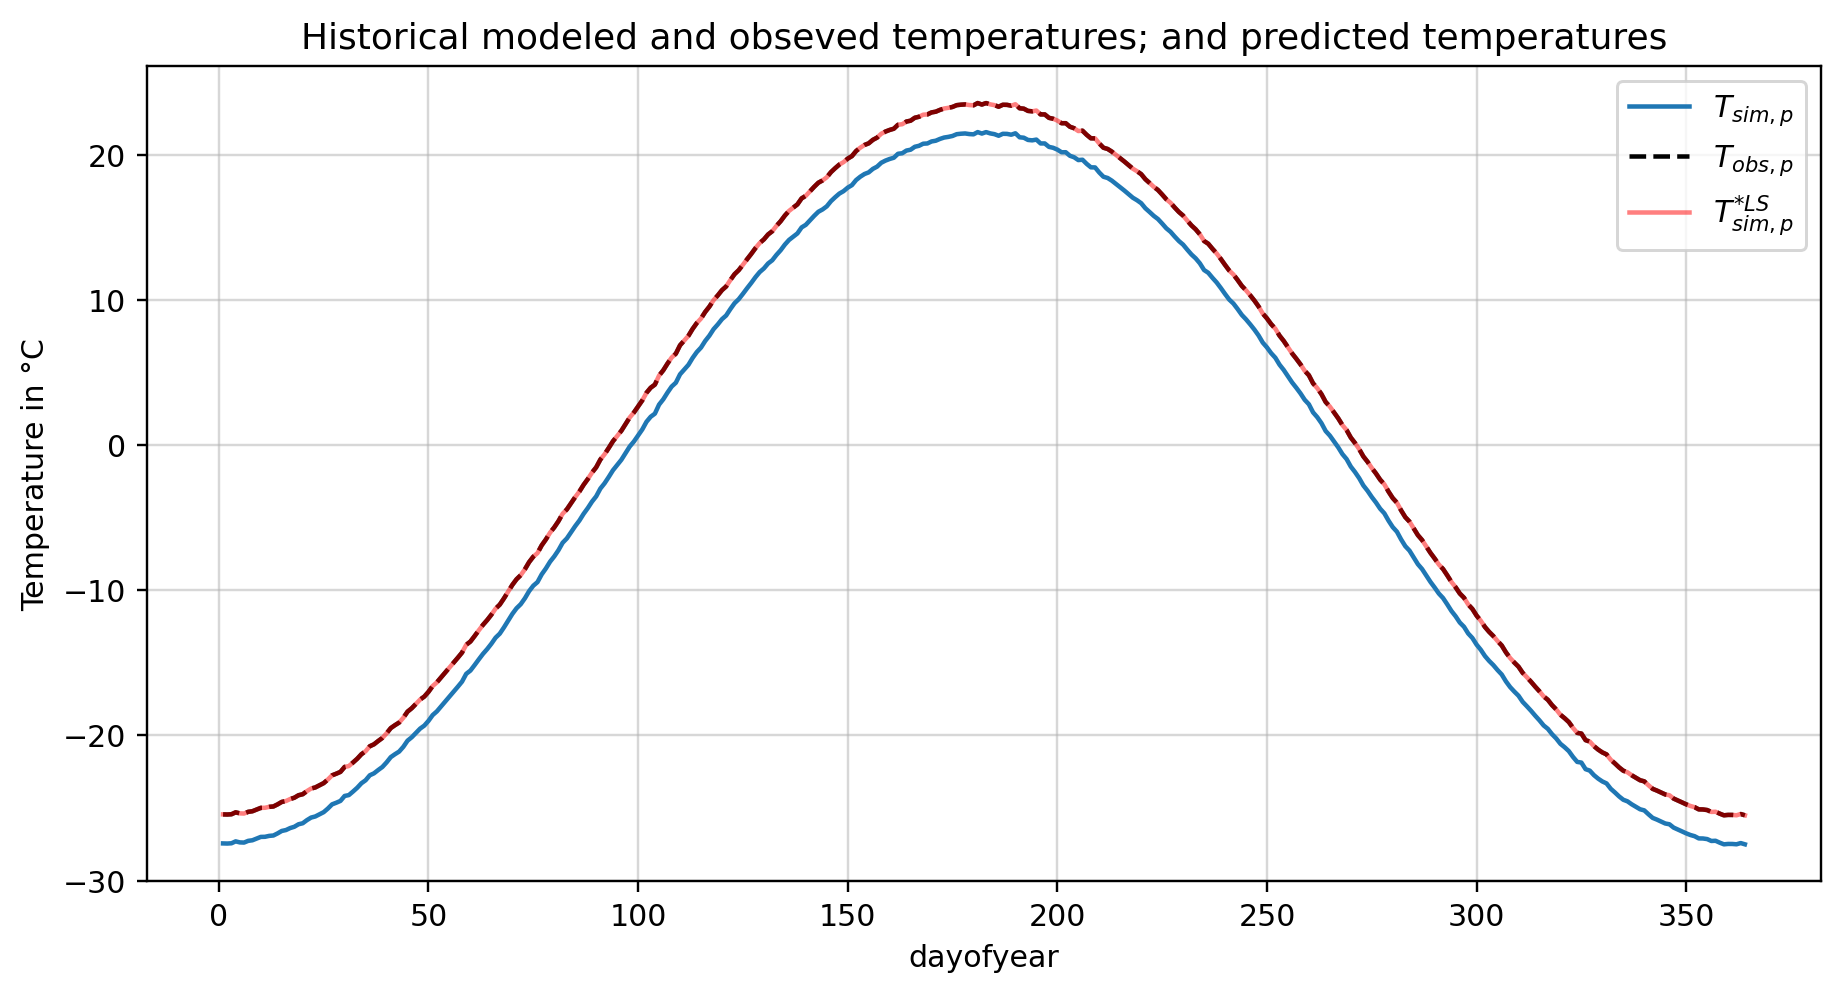

In [18]:
plt.figure(figsize=(10,5),dpi=216)
simp[var].groupby('time.dayofyear').mean(...)[:-1].plot(label='$T_{sim,p}$', color='C0')
obsp[var].groupby('time.dayofyear').mean(...)[:-1].plot(label='$T_{obs,p}$', color='black', linestyle='--')
tas_ls_corrected[var].groupby('time.dayofyear').mean(...)[:-1].plot(label='$T^{*LS}_{sim,p}$', color='red', alpha=.5)
plt.title('Predicted modeled and observed temperatures')
plt.gca().yaxis.grid(alpha=0.5)
plt.gca().xaxis.grid(alpha=0.5)
plt.ylabel('Temperature in °C')
plt.legend();

# Compute $MBE$ and $RMSE$

In [19]:
from sklearn.metrics import mean_squared_error
rmse = lambda targets, predictions: mean_squared_error(targets, predictions, squared=False)

def rmse3d(targets, predictions) -> float:
    rmses = []
    a, b = targets.transpose('lat','lon','time'), predictions.transpose('lat','lon','time')
    for lat in range(len(a)):
        for lon in range(len(a[lat])):
            rmses.append(rmse(a[lat][lon], b[lat][lon]))
    return np.array(rmses).mean()

mbe = lambda targets, predictions: (np.array(predictions) - np.array(targets)).mean()

In [25]:
print('''
===== Mean Bias Error =====
Default:       ~{mbe1}
LS-corrected:  ~{mbe2}

===== Root Mean Square Error =====
Default:      ~{rmse1}
LS-corrected: ~{rmse2}

'''.format(
    mbe1=np.round(mbe(obsp[var], simp[var]),4),
    mbe2=np.round(mbe(obsp[var], tas_ls_corrected[var]),4),
    rmse1=np.round(rmse3d(obsp[var], simp[var]),4),
    rmse2=np.round(rmse3d(obsp[var], tas_ls_corrected[var]),4)
))


===== Mean Bias Error =====
Default:       ~-2.0
LS-corrected:  ~0.0

===== Root Mean Square Error =====
Default:      ~2.0
LS-corrected: ~0.0


